<h2 style="color:purple">Exercise</h2>

Download employee retention dataset from here: https://www.kaggle.com/giripujar/hr-analytics. 
1. Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
2. Plot bar charts showing impact of employee salaries on retention
3. Plot bar charts showing corelation between department and employee retention
4. Now build logistic regression model using variables that were narrowed down in step 1
5. Measure the accuracy of the mode

In [8]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 


In [14]:
df = pd.read_csv('HR_comma_sep.csv',sep=',')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [15]:
left = df[df.left==1]
left.shape

(3571, 10)

In [16]:
retained = df[df.left==0]
retained.shape

(11428, 10)

<AxesSubplot:xlabel='salary'>

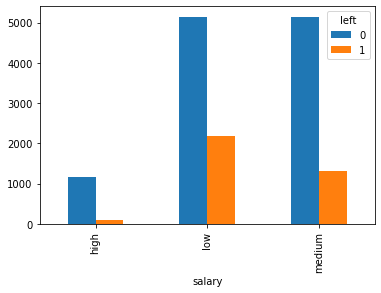

In [17]:
pd.crosstab(df.salary,df.left).plot(kind='bar')

<AxesSubplot:xlabel='Department'>

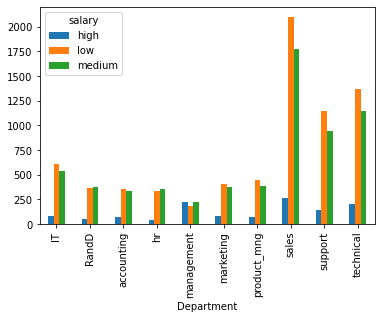

In [18]:
pd.crosstab(df.Department , df.salary).plot(kind = 'bar')

In [27]:
subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,0
1,0.80,262,0,1
2,0.11,272,0,1
3,0.72,223,0,0
4,0.37,159,0,0


In [28]:
salary_dummies = pd.get_dummies(subdf.salary, prefix="salary")

In [29]:
df_with_dummies = pd.concat([subdf,salary_dummies],axis='columns')

In [30]:
df_with_dummies.drop('salary',axis='columns',inplace=True)
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_0,salary_1,salary_2
0,0.38,157,0,1,0,0
1,0.80,262,0,0,1,0
2,0.11,272,0,0,1,0
3,0.72,223,0,1,0,0
4,0.37,159,0,1,0,0


In [24]:
X = df_with_dummies
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [25]:
y = df.left

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.85)

In [32]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [33]:
model.fit(X_train, y_train)

LogisticRegression()

In [36]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [34]:
model.score(X_test,y_test)

0.7746666666666666